Loading Dependencies

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

Loading dataset

In [22]:
data= pd.read_csv("gold_price data.csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [23]:
data.shape

(2290, 6)

Getting some basic information about the data

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Checking for missing data values

In [25]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Getting the statistical measurs of the data

In [26]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Finding Correlation between data columns

In [27]:
data.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [28]:
correlations= data.corr()

<AxesSubplot:>

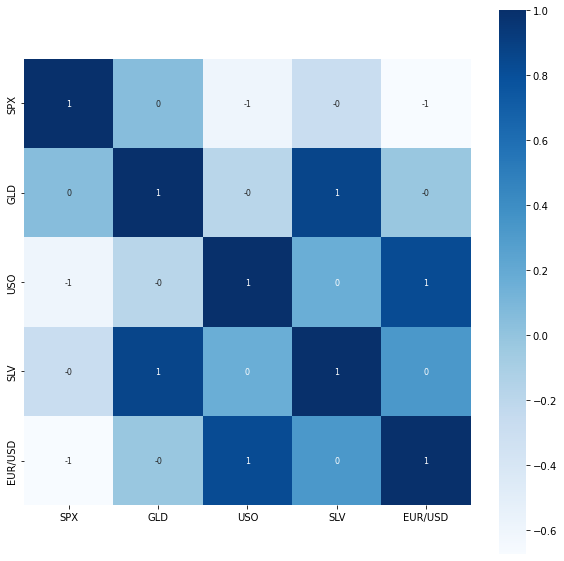

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(correlations, cbar= True, square= True, fmt='.0f', annot= True, annot_kws={'size':8}, cmap="Blues")

In [30]:
#Correlation values of GLD
print(correlations['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\snjts\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

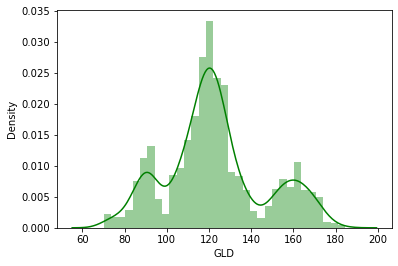

In [31]:
#Checking the distribution of GLD price
sns.distplot(data['GLD'], color='green')

Splitting the features and target

In [32]:
X= data.drop(['Date','GLD'], axis=1)
y= data['GLD']

In [33]:
print(X)

print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into train dat and test data

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Training: Random Forest Regressor  

In [36]:
regressor= RandomForestRegressor(n_estimators=100)

In [37]:
#Training the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

Model Evaluation

In [38]:
# Prediction on test data

test_data_prediction= regressor.predict(X_test)

In [41]:
print(test_data_prediction)

[168.37799913  81.99849995 115.83470014 127.78340091 120.68540156
 154.7668977  150.40579847 126.17150009 117.38709873 125.93640068
 117.02740088 170.51940048 141.80279851 167.60089857 115.17120007
 117.92150034 139.47080275 170.0115009  159.43980323 159.12739949
 155.15420022 125.34190029 176.14879953 157.37410311 125.21560048
  93.83129946  78.00729999 120.23479995 119.0848992  167.50980095
  88.06099985 125.29819996  91.23940077 117.84760005 121.0877993
 136.2503011  115.51360156 115.3348007  149.13999987 107.35440087
 104.3390025   87.22789796 126.57460082 117.79009989 152.47669969
 119.49060012 108.30020003 108.22829893  93.19610069 127.11389802
  74.98710049 113.6672994  121.2624003  111.41019913 118.80069888
 120.6787991  158.90740016 167.43950133 147.00469694  86.01719857
  94.23890069  86.7812989   90.63829987 119.11770063 126.47120042
 127.49710004 169.43899917 122.25849906 117.40439921  98.73789994
 167.7554016  142.90189826 132.02390272 121.08300212 120.84659959
 119.756300

In [42]:
#R2 Error

error_score= metrics.r2_score(y_test, test_data_prediction)
print("R2 Error is:", error_score)

R2 Error is: 0.9894246090909742


Comparing the Actual Value and Predicted Values

In [43]:
y_test= list(y_test)

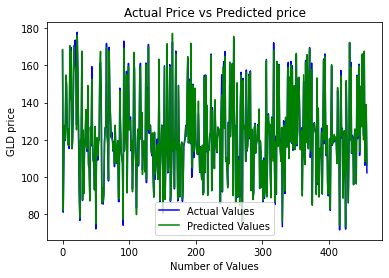

In [48]:
plt.plot(y_test, color='blue', label= 'Actual Values')
plt.plot(test_data_prediction, color= 'green', label='Predicted Values')
plt.title("Actual Price vs Predicted price")
plt.xlabel("Number of Values")
plt.ylabel("GLD price")
plt.legend()
plt.show()